# TP Genetic algorithm

>* ##  Réalisé par: SOKRI Yasser IID2 41

>* ## Encadré par: Monsieur ELKHALFI Hamza



In [31]:
import numpy as np
import math

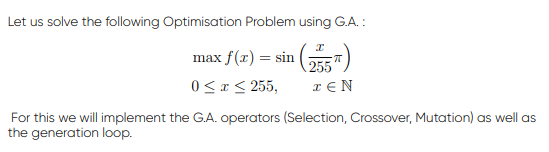

# Étapes:
* definir la taille de population
* nombre de generation
* intialiser une population en precisant la taille (ci-dessus)
* evaluer la population (fitness function)
> boucle
* selectionner les parents
* faire des croissement et mutation
* evaluer la nouvelle population
* la population qui va survivre
> répeter ces instructions jusqu'à l'un des critère d'arrets soit realiser

> # Intialisation d'une population

In [32]:
def init_population(N):
  liste = []
  for i in range(N):
    liste.append(np.random.choice([1, 0], 8))
  return liste

In [33]:
init_population(6)

[array([0, 1, 1, 0, 1, 1, 0, 1]),
 array([0, 0, 1, 0, 0, 0, 0, 1]),
 array([0, 0, 1, 1, 1, 0, 1, 0]),
 array([1, 1, 1, 0, 0, 1, 0, 1]),
 array([0, 1, 1, 0, 0, 1, 0, 0]),
 array([1, 0, 1, 0, 1, 1, 1, 0])]

> # Fonction d'evaluation Fitness

> ### Fonction Conversion d'un nombre binaire au décimal

In [34]:
def binaryToDec(x):
  dec = 0
  for i in range(8):
    dec = 2**i * x[-i-1] + dec
    #print(i, x[i-1])
  return dec

### Test conversion:

In [35]:
x = np.random.choice([1, 0], 8)
print(x)
binaryToDec(x)

[1 0 1 0 1 1 1 0]


174

In [36]:
def fitness(x):
  y = binaryToDec(x)
  return math.sin((y*math.pi) / 255)

In [37]:
x = np.random.choice([1, 0], 8)
print(x)
fitness(x)

[0 1 0 0 0 1 1 1]


0.7673626814486969

> # Selection

In [38]:
def select(pop_size, n_parents):
  s = []
  for i in range(n_parents):
    s.append(np.random.randint(pop_size, size=2))
  return s

In [39]:
select(4, 8)

[array([1, 2]),
 array([0, 1]),
 array([1, 1]),
 array([0, 3]),
 array([3, 1]),
 array([3, 3]),
 array([3, 1]),
 array([3, 2])]

In [40]:
def select2(n_matings, n_parents):
    return np.random.randint(0, n_matings, (n_matings, n_parents))

In [41]:
select2(8, 2)

array([[4, 6],
       [2, 2],
       [0, 6],
       [1, 3],
       [5, 2],
       [1, 0],
       [3, 1],
       [7, 7]])

> # Croissement

In [42]:
def crossover2(parent1, parent2):
  enfant = []
  for i in range(8):
    if(np.random.randint(2) == 0):
      enfant.append(parent1[i])
    else :
      enfant.append(parent2[i])

  return enfant

> # Mutation

In [43]:
def mutation(individu):

  K = np.zeros(8)
  for i in range(len(individu)):
      u = np.random.uniform(0, 1)
      if(u < 0.5):
        if individu[i] == 0:
          K[i]= 1
        else:
          K[i] = 0
  return K

> # Survival

In [44]:
def survival(f, n_survivors):
  #trier pui garder que les n_survivors premier elements
    return np.argsort(-f)[:n_survivors]

In [45]:
F = np.array([fitness(a) for a in A])
F

array([0.06156091, 0.99573418, 0.9741386 , 0.77520398, 0.51591783,
       0.56767472, 0.9984636 , 0.84695821, 0.02463745, 0.85979985,
       0.23194764, 0.30315267])

In [46]:
survival(F, 8)

array([6, 1, 2, 9, 7, 3, 5, 4])

> # Eliminer les duplication

In [47]:
from scipy.spatial.distance import cdist

def eliminate_duplicates(X):
    D = cdist(X, X)
    D[np.triu_indices(len(X))] = np.inf
    return np.all(D > 1e-32, axis=1)

In [48]:
pop_size = 5
n_gen = 100

X = init_population(pop_size)
F = np.array([fitness(x) for x in X])

for k in range(n_gen):
  # Selectionner les parents pour appliquer le croissement par la suite
    parents = select2(pop_size, 2)

  # croissement - mutation
    _X = np.array([mutation(crossover2(X[a], X[b])) for a, b in parents])
    _F = np.array([fitness(x) for x in _X])

    # concatener la population 
    X = np.row_stack([X, _X])
    F = np.concatenate([F, _F])

    # Eliminer les elements dupliques
    I = eliminate_duplicates(X)
    X = X[I]
    F = F[I]

    # les elements qui vont survivre
    I = survival(F, pop_size)
    X, F = X[I], F[I]

    # afficher les resultats de chaque generation
    print(k+1, F[0], X[0].astype(np.int))

1 0.9995257197133659 [1 0 0 0 0 0 1 0]
2 0.9995257197133659 [1 0 0 0 0 0 1 0]
3 0.9995257197133659 [1 0 0 0 0 0 1 0]
4 0.9995257197133659 [1 0 0 0 0 0 1 0]
5 0.9995257197133659 [1 0 0 0 0 0 1 0]
6 0.9995257197133659 [1 0 0 0 0 0 1 0]
7 0.9995257197133659 [1 0 0 0 0 0 1 0]
8 0.9999810273487268 [0 1 1 1 1 1 1 1]
9 0.9999810273487268 [0 1 1 1 1 1 1 1]
10 0.9999810273487268 [0 1 1 1 1 1 1 1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


11 0.9999810273487268 [0 1 1 1 1 1 1 1]
12 0.9999810273487268 [0 1 1 1 1 1 1 1]
13 0.9999810273487268 [0 1 1 1 1 1 1 1]
14 0.9999810273487268 [0 1 1 1 1 1 1 1]
15 0.9999810273487268 [0 1 1 1 1 1 1 1]
16 0.9999810273487268 [0 1 1 1 1 1 1 1]
17 0.9999810273487268 [0 1 1 1 1 1 1 1]
18 0.9999810273487268 [0 1 1 1 1 1 1 1]
19 0.9999810273487268 [0 1 1 1 1 1 1 1]
20 0.9999810273487268 [0 1 1 1 1 1 1 1]
21 0.9999810273487268 [0 1 1 1 1 1 1 1]
22 0.9999810273487268 [0 1 1 1 1 1 1 1]
23 0.9999810273487268 [0 1 1 1 1 1 1 1]
24 0.9999810273487268 [0 1 1 1 1 1 1 1]
25 0.9999810273487268 [0 1 1 1 1 1 1 1]
26 0.9999810273487268 [0 1 1 1 1 1 1 1]
27 0.9999810273487268 [0 1 1 1 1 1 1 1]
28 0.9999810273487268 [0 1 1 1 1 1 1 1]
29 0.9999810273487268 [0 1 1 1 1 1 1 1]
30 0.9999810273487268 [0 1 1 1 1 1 1 1]
31 0.9999810273487268 [0 1 1 1 1 1 1 1]
32 0.9999810273487268 [0 1 1 1 1 1 1 1]
33 0.9999810273487268 [0 1 1 1 1 1 1 1]
34 0.9999810273487268 [0 1 1 1 1 1 1 1]
35 0.9999810273487268 [0 1 1 1 1 1 1 1]


## Conclusion: 
- Ce laboratoire TP était bénéfique en termes de pratique d'un exemple d'algorithme génétique, du fait qu'il me donne une idée plus claire de ces derniers.